# Dimensionamento usina segundo critérios mistos NBR-6123 e ASCE/SEI 7-22

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga de vento segundo NBR-6123

### Velocidade básica de vento

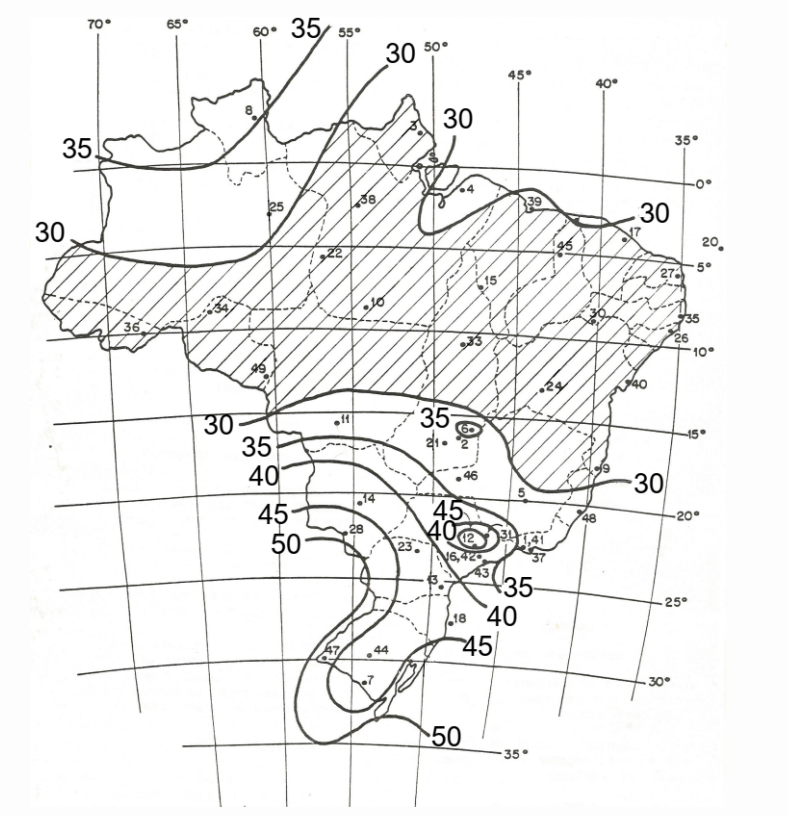

### Fator S1

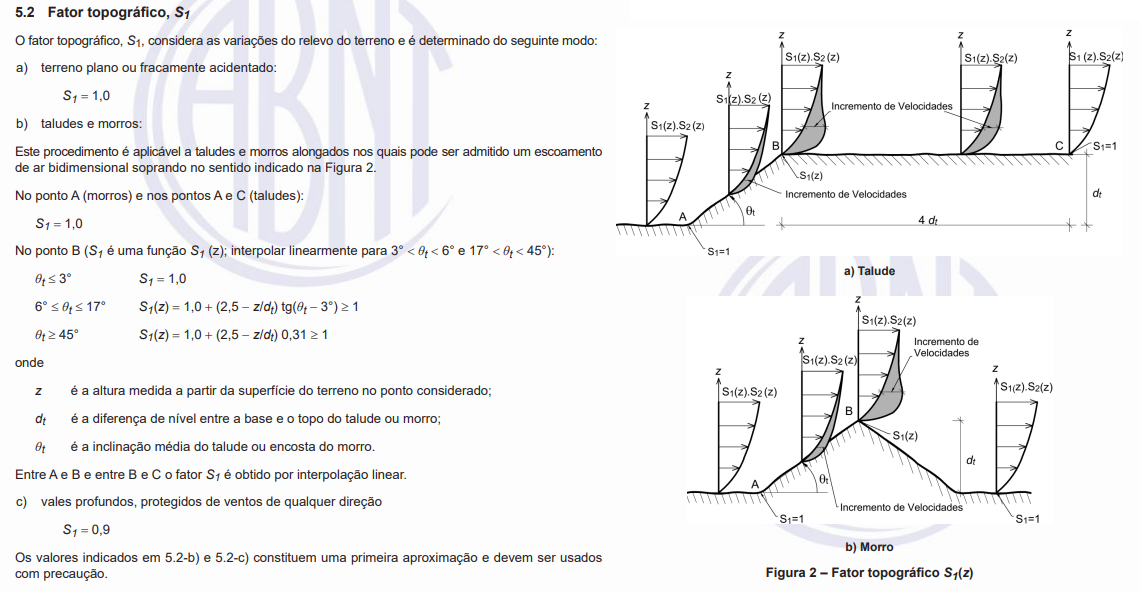

### Fator S2

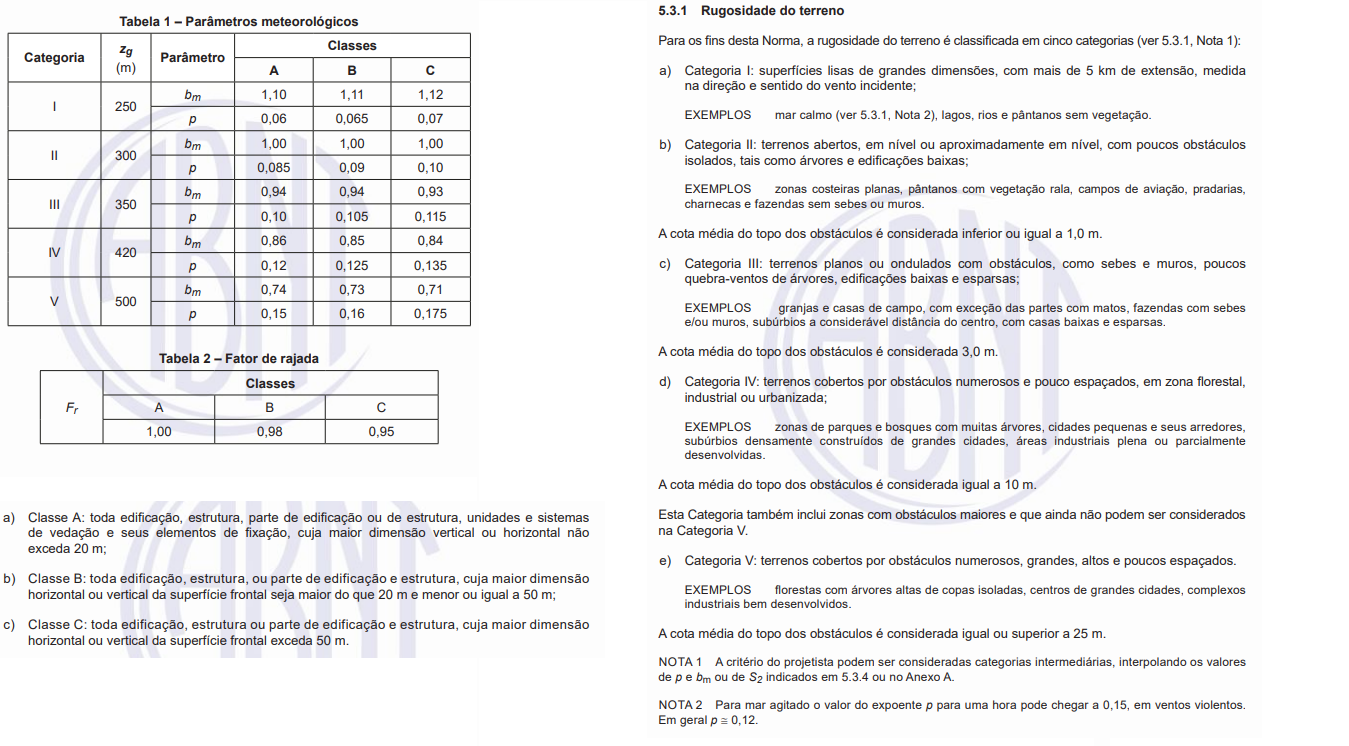

### Fator S3

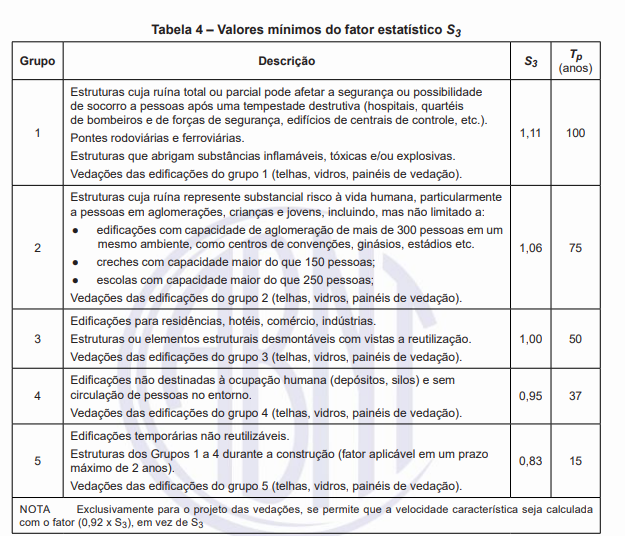

### Estimativa das cargas presentes

In [2]:
V0=35 #m/s
S1=1
b=1
Fr=1
p=0.09
z=3 #m --> altuma maxima da estrutura
S2=b*Fr*(z/10)**p
S3=0.95
alfa=20 #angulo maximo da estrutura em graus
#Considerando uma mesa com placas de 2x1.134metros duas placas em retrato por 30 placas no comprimento.

In [3]:
Vk=V0*S1*S2*S3 #m/s
print ('Velocidade corrigida-->',Vk, 'm/s')

Velocidade corrigida--> 29.83544793825027 m/s


In [4]:
q=0.613*Vk**2 #N/m2
print('q-->', q, 'N/m2')

q--> 545.6643736034139 N/m2


## Estimativas segundo ASCE/SEI 7-22

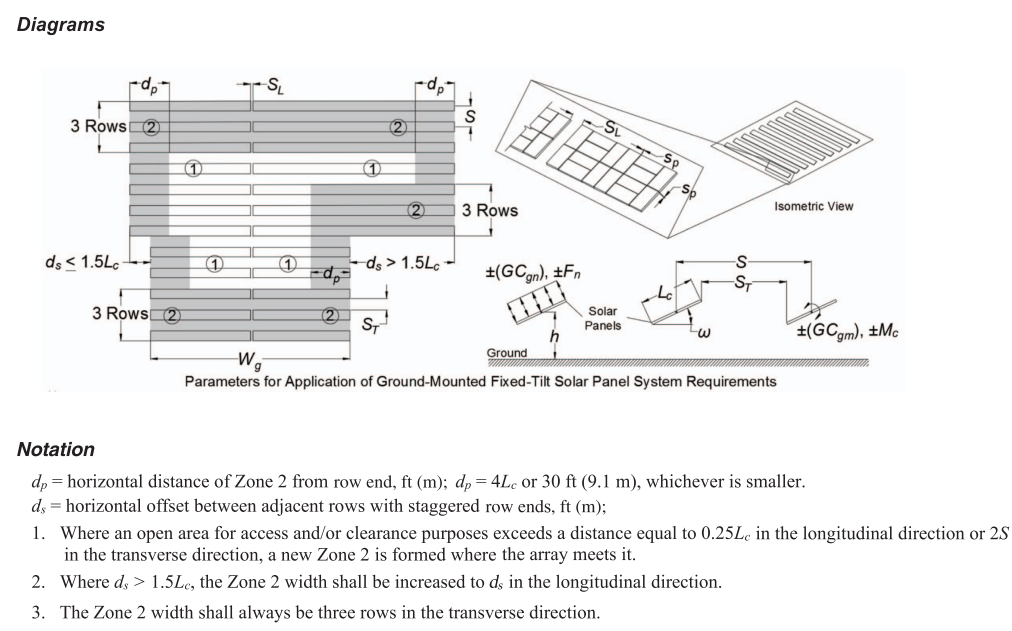

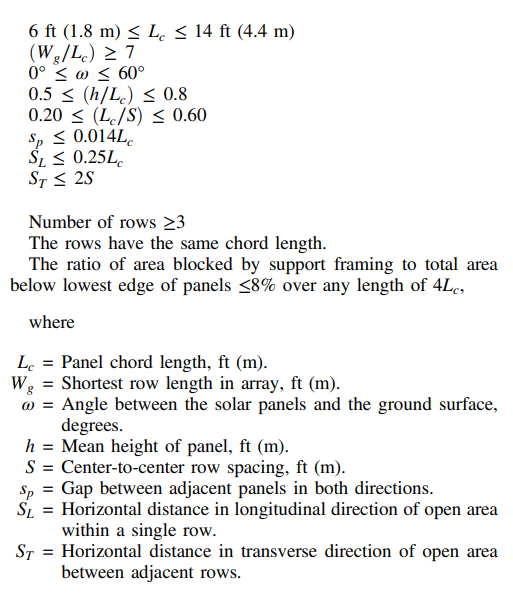

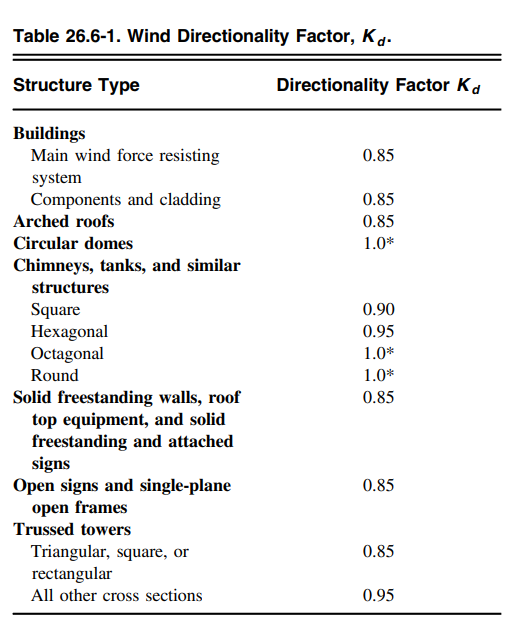

## Dados geométricos da usina

In [5]:
Lc=4.0 #m
h=2.5 #m
S=6.8 #m
w=alfa #graus
Wg=35 #metros
Kd=0.85

## Verificação geometria usina

In [6]:
if Lc>=1.8 and Lc<=4.4:
    print(f"Lance da mesa ok, Lc= {Lc:0.2f}")
else:
    print(f"Geometria da mesa fora do especificado, Lc= {Lc:0.2f}")


Lance da mesa ok, Lc= 4.00


In [7]:
if Wg/Lc>=7:
    print(f"Largura mínima da fileira ok, Wg/Lc={Wg/Lc:0.2f}")
else:
    print(f"Largura da fileira fora do especificado, Wg/Lc={Wg/Lc:0.2f}")

Largura mínima da fileira ok, Wg/Lc=8.75


In [8]:
if 0.5<=h/Lc and h/Lc<=0.8:
    print(f"Razão h/Lc está ok, h/Lc={h/Lc:0.2f}")
else:
    print(f"Razão h/Lc está fora do especificado, h/Lc={h/Lc:0.2f}")

Razão h/Lc está ok, h/Lc=0.62


In [9]:
if 0.2<=Lc/S and Lc/S<=0.6:
    print(f"A razão Lc/S está ok, Lc/S={Lc/S:0.2f}")
else:
    print(f"A razão Lc/S não está ok, Lc/S={Lc/S:0.2f}")


A razão Lc/S está ok, Lc/S=0.59


In [10]:
print(f' O gap entre paineis na vertical deve ser menor que: {0.014*Lc:0.2f}m')

 O gap entre paineis na vertical deve ser menor que: 0.06m


In [11]:
print (f'O GAP entre mesas laterais deve ser menor que: {0.25*Lc:0.2f}m')

O GAP entre mesas laterais deve ser menor que: 1.00m


In [12]:
print(f'O GAP entre mesas deve ser menor que: {2*S:0.2f}m')

O GAP entre mesas deve ser menor que: 13.60m


## Dados sobre a frequência fundamental da estrutura 

### Modos de vibração

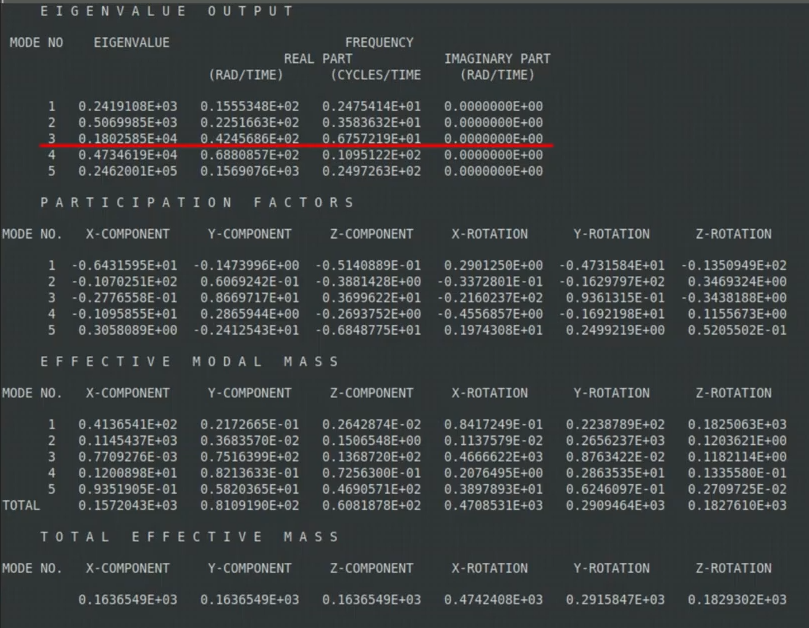

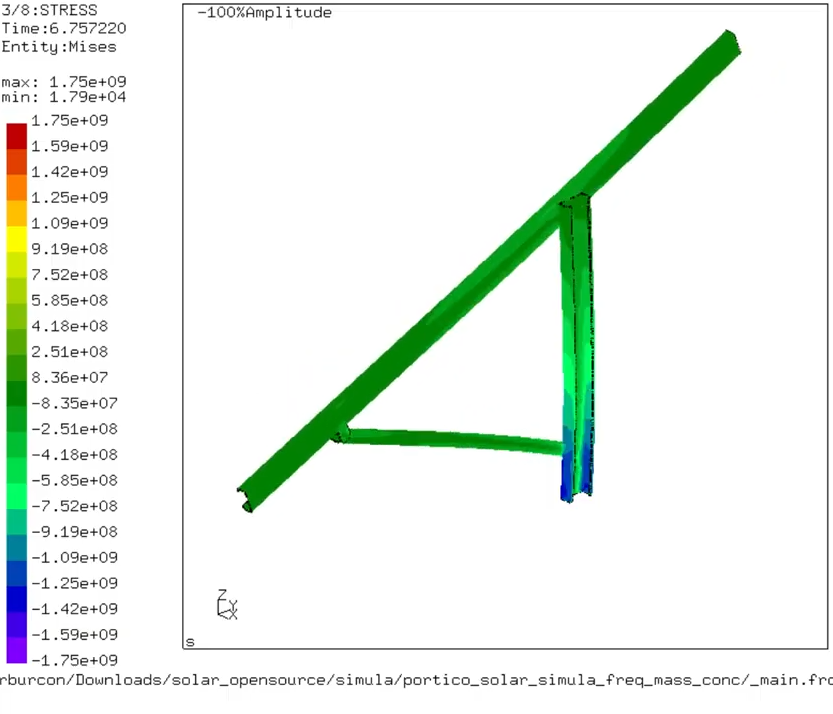

## Frequência reduzida

### Dados

In [13]:
n=6.75 #hz -> frequencia fundamental do terceiro modo de vibração.

In [14]:
N=n*Lc/Vk
print(f'A frequência reduzida é de: {N:0.2f}')

A frequência reduzida é de: 0.90


### Área efetiva de vento (por fileira)

In [15]:
A=Wg*Lc #m2
A=A*10.7639 #ft2
print(f'Área efeitva por fileira: {A:0.2f}ft^2')

Área efeitva por fileira: 1506.95ft^2


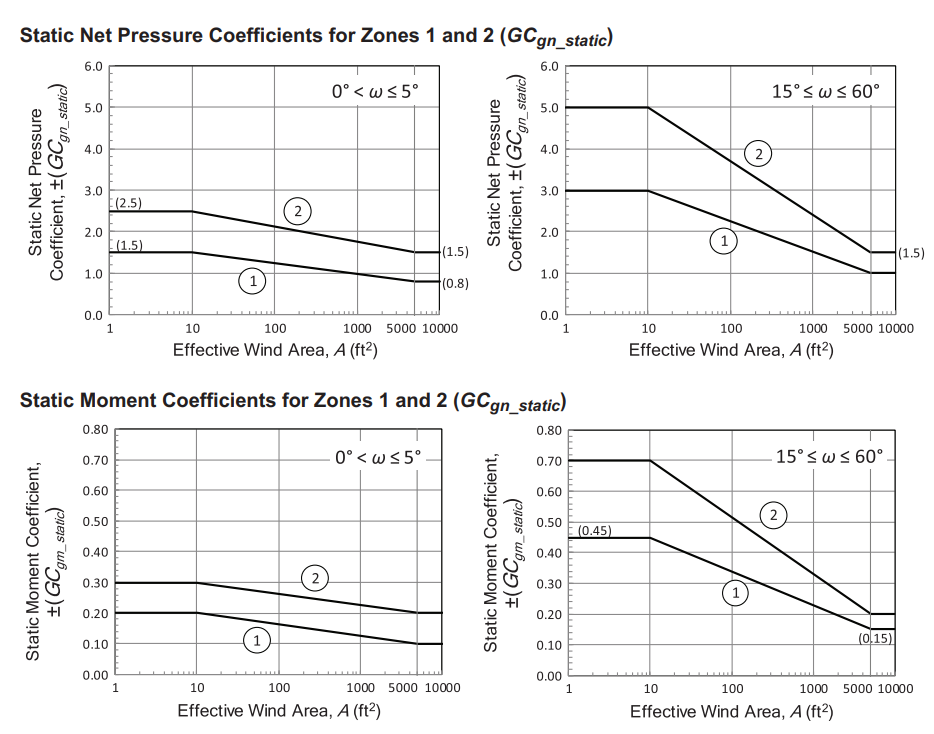

In [16]:
#Coeficiente de pressão estático
GCgn_static_1=1.6 #fileira interna
GCgn_static_2=2.6 #fileira externa

#Coeficiente de momento estático
GCgm_static_1=0.22 #fileira interna
GCgm_static_2=0.34 #fileira externa

In [17]:
A1=min(4*Lc**2,500)
A2=min(15*Lc**2,1000)
print(f'A1={A1:0.2f}')
print(f'A2={A2:0.2f}')
print(f'A={A:0.2f}')

A1=64.00
A2=240.00
A=1506.95


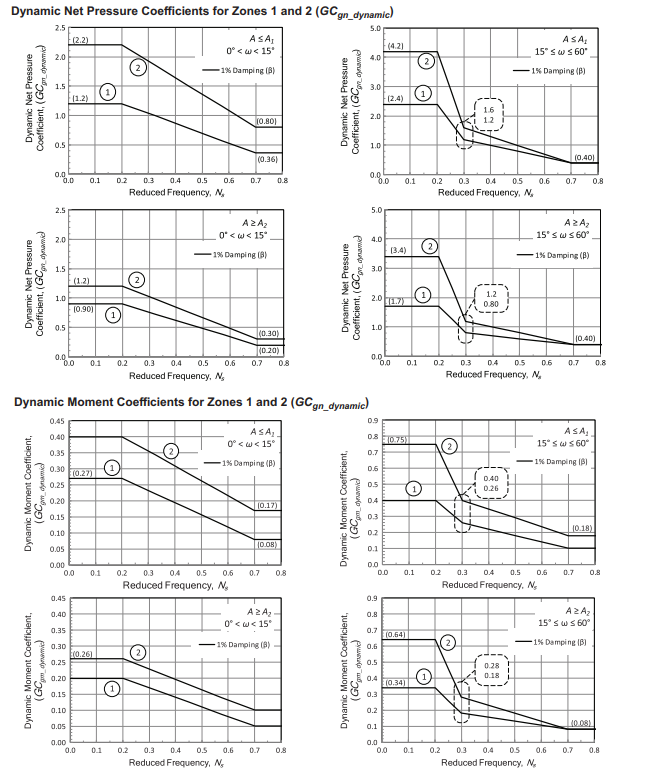

In [18]:
#Coeficiente de pressão dinâmico
GCgn_dynamic_1=0.4 #fila interna
GCgn_dynamic_2=0.4 #fila externa

#Coeficiente de momento dinâmico
GCgm_dynamic_1=0.1 #fila interna
GCgm_dynamic_2=0.1 #fila externa

## Carregamentos de vento corrigido

In [19]:
#Filas internas força 
GCgn_1_1=(GCgn_static_1+GCgn_dynamic_1)
GCgn_1_2=(-GCgn_static_1+GCgn_dynamic_1)
GCgn_1_3=(-GCgn_static_1-GCgn_dynamic_1)
GCgn_1_4=(GCgn_static_1-GCgn_dynamic_1)

#Filas internas momento
GCgm_1_1=(GCgm_static_1+GCgm_dynamic_1)
GCgm_1_2=(-GCgm_static_1+GCgm_dynamic_1)
GCgm_1_3=(-GCgm_static_1-GCgm_dynamic_1)
GCgm_1_4=(GCgm_static_1-GCgm_dynamic_1)

#Filas externa força 
GCgn_2_1=(GCgn_static_2+GCgn_dynamic_2)
GCgn_2_2=(-GCgn_static_2+GCgn_dynamic_2)
GCgn_2_3=(-GCgn_static_2-GCgn_dynamic_2)
GCgn_2_4=(GCgn_static_2-GCgn_dynamic_2)

#Filas externa momento
GCgm_2_1=(GCgm_static_2+GCgm_dynamic_2)
GCgm_2_2=(-GCgm_static_2+GCgm_dynamic_2)
GCgm_2_3=(-GCgm_static_2-GCgm_dynamic_2)
GCgm_2_4=(GCgm_static_2-GCgm_dynamic_2)

### Forças

In [20]:
#Fila interna
print(f'O valor da F1 é +/- {abs(q*Kd*GCgn_1_1*A*0.092903):0.2f}N por mesa')
print(f'O valor da F2 é +/- {abs(q*Kd*GCgn_1_2*A*0.092903):0.2f}N por mesa')
print(f'O valor da F3 é +/- {abs(q*Kd*GCgn_1_3*A*0.092903):0.2f}N por mesa')
print(f'O valor da F4 é +/- {abs(q*Kd*GCgn_1_4*A*0.092903):0.2f}N por mesa')

O valor da F1 é +/- 129867.94N por mesa
O valor da F2 é +/- 77920.76N por mesa
O valor da F3 é +/- 129867.94N por mesa
O valor da F4 é +/- 77920.76N por mesa


In [21]:
#Fila externa
print(f'O valor da F1 é +/- {abs(q*Kd*GCgn_2_1*A*0.092903):0.2f}N por mesa')
print(f'O valor da F2 é +/- {abs(q*Kd*GCgn_2_2*A*0.092903):0.2f}N por mesa')
print(f'O valor da F3 é +/- {abs(q*Kd*GCgn_2_3*A*0.092903):0.2f}N por mesa')
print(f'O valor da F4 é +/- {abs(q*Kd*GCgn_2_4*A*0.092903):0.2f}N por mesa')

O valor da F1 é +/- 194801.91N por mesa
O valor da F2 é +/- 142854.73N por mesa
O valor da F3 é +/- 194801.91N por mesa
O valor da F4 é +/- 142854.73N por mesa


### Momento

In [22]:
#Fila interna
print(f'O valor do M1 é +/- {abs(q*Kd*GCgm_1_1*A*0.092903*Lc):0.2f}N.m por mesa')
print(f'O valor do M2 é +/- {abs(q*Kd*GCgm_1_2*A*0.092903*Lc):0.2f}N.m por mesa')
print(f'O valor do M3 é +/- {abs(q*Kd*GCgm_1_3*A*0.092903*Lc):0.2f}N.m por mesa')
print(f'O valor do M4 é +/- {abs(q*Kd*GCgm_1_4*A*0.092903*Lc):0.2f}N.m por mesa')

O valor do M1 é +/- 83115.48N.m por mesa
O valor do M2 é +/- 31168.31N.m por mesa
O valor do M3 é +/- 83115.48N.m por mesa
O valor do M4 é +/- 31168.31N.m por mesa


In [23]:
#Fila externa
print(f'O valor do M1 é +/- {abs(q*Kd*GCgm_2_1*A*0.092903*Lc):0.2f}N.m por mesa')
print(f'O valor do M2 é +/- {abs(q*Kd*GCgm_2_2*A*0.092903*Lc):0.2f}N.m por mesa')
print(f'O valor do M3 é +/- {abs(q*Kd*GCgm_2_3*A*0.092903*Lc):0.2f}N.m por mesa')
print(f'O valor do M4 é +/- {abs(q*Kd*GCgm_2_4*A*0.092903*Lc):0.2f}N.m por mesa')

O valor do M1 é +/- 114283.79N.m por mesa
O valor do M2 é +/- 62336.61N.m por mesa
O valor do M3 é +/- 114283.79N.m por mesa
O valor do M4 é +/- 62336.61N.m por mesa
